<a href="https://colab.research.google.com/github/tasyaaash29/TI01_Aulya-Natasya_Praktikum-ML/blob/main/Latihan_Praktikum12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# PRAKTIKUM MANDIRI
# PCA pada Dataset Breast Cancer (High-Dimensional Medical Data)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# 1. Load Dataset Breast Cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

print("=== Contoh Data (5 Baris Pertama) ===")
display(df.head())

print("\nJumlah Fitur:", cancer.data.shape[1])
print("Jumlah Sampel:", cancer.data.shape[0])

=== Contoh Data (5 Baris Pertama) ===


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Jumlah Fitur: 30
Jumlah Sampel: 569


In [ ]:
# 2. Pisahkan X dan y
X = cancer.data
y = cancer.target
print("Akurasi:", accuracy_score(y_test, y_pred_no_pca))

Akurasi: 0.9824561403508771


In [ ]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# 4. Standardisasi (WAJIB untuk PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
# 5. SVM tanpa PCA (Baseline)
svm_no_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = svm_no_pca.predict(X_test_scaled)

In [ ]:
print("Akurasi:", accuracy_score(y_test, y_pred_no_pca))
print(classification_report(y_test, y_pred_no_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_no_pca))


=== HASIL SVM TANPA PCA ===
Akurasi: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[41  1]
 [ 1 71]]


In [ ]:
# 6. PCA (ambil 3 komponen utama)
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("Rasio:", pca.explained_variance_ratio_)
print("Total Varians Terjelaskan:", pca.explained_variance_ratio_.sum())

Rasio: [0.44413492 0.18944618 0.09543356]
Total Varians Terjelaskan: 0.7290146639367362


In [ ]:
# 7. SVM setelah PCA
# ===========================================================
svm_pca = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)
y_pred_pca = svm_pca.predict(X_test_pca)

print("Akurasi:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_pca))

Akurasi: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
 [[39  3]
 [ 3 69]]


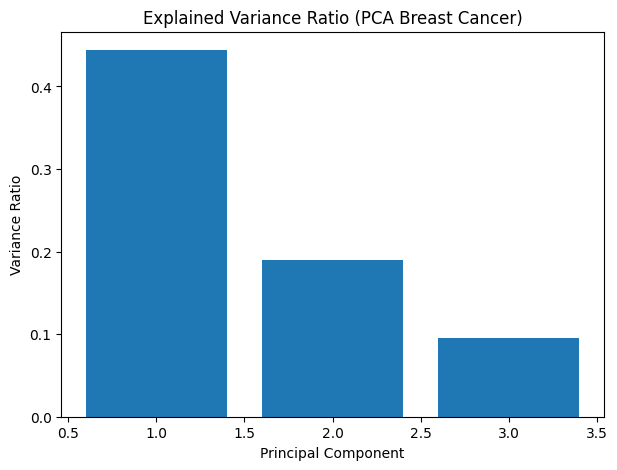

In [ ]:
# 8. Visualisasi Explained Variance Ratio
plt.figure(figsize=(7,5))
plt.bar(range(1, 4), pca.explained_variance_ratio_)
plt.title("Explained Variance Ratio (PCA Breast Cancer)")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.show()

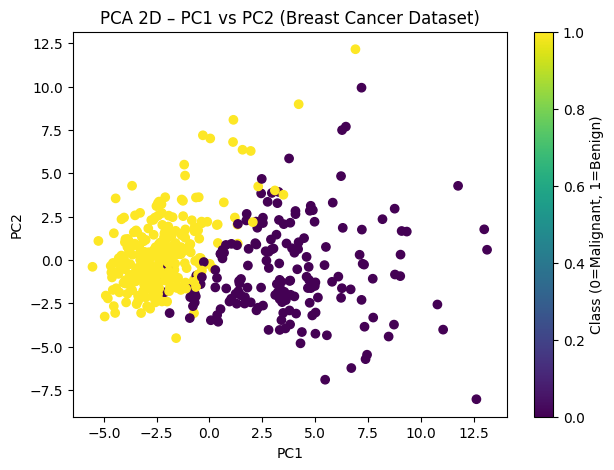

In [ ]:
# 9. Visualisasi PCA 2D (PC1 vs PC2)
plt.figure(figsize=(7,5))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train)
plt.title("PCA 2D – PC1 vs PC2 (Breast Cancer Dataset)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Class (0=Malignant, 1=Benign)')
plt.show()

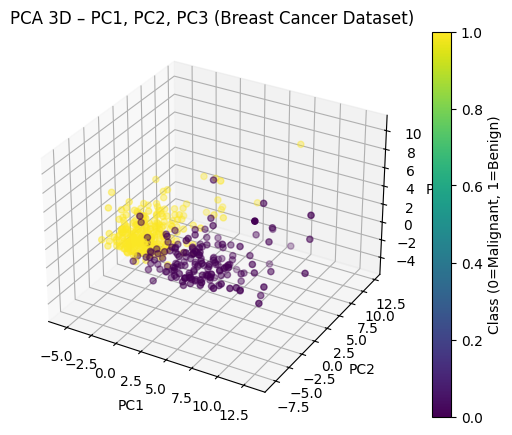

In [ ]:
# 10. Visualisasi PCA 3D
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_train_pca[:,0],
    X_train_pca[:,1],
    X_train_pca[:,2],
    c=y_train
)
ax.set_title("PCA 3D – PC1, PC2, PC3 (Breast Cancer Dataset)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.colorbar(scatter, label='Class (0=Malignant, 1=Benign)')
plt.show()